In [2]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

In [3]:
df=pd.read_csv('F:\\Shipping_Pricing_Prediction\\Notebook\Preprocessed_df.csv')

In [4]:
df.head()

,PO_/_SO_#,ASN/DN_#,Country,Fulfill_Via,Vendor_INCO_Term,Shipment_Mode,Sub_Classification,Unit_of_Measure_(Per_Pack),Line_Item_Quantity,Line_Item_Value,Pack_Price,Unit_Price,First_Line_Designation,Weight_(Kilograms),Freight_Cost_(USD),Line_Item_Insurance_(USD),Days_to_Process
0,SCMS,ASN,Côte d'Ivoire,Direct Drop,EXW,Air,HIV test,30,19,551.0,29.00,0.97,Yes,13.0,780.34,NaN,-947
1,SCMS,ASN,Vietnam,Direct Drop,EXW,Air,Pediatric,240,1000,6200.0,6.20,0.03,Yes,358.0,4521.50,NaN,-782
2,SCMS,ASN,Côte d'Ivoire,Direct Drop,FCA,Air,HIV test,100,500,40000.0,80.00,0.80,Yes,171.0,1653.78,NaN,-861
3,SCMS,ASN,Vietnam,Direct Drop,EXW,Air,Adult,60,31920,127360.8,3.99,0.07,Yes,1855.0,16007.06,NaN,-856
4,SCMS,ASN,Vietnam,Direct Drop,EXW,Air,Adult,60,38000,121600.0,3.20,0.05,Yes,7590.0,45450.08,NaN,-877


In [5]:
df.shape

(10324, 17)

In [6]:
df.duplicated().sum()

61

In [7]:
# Drop duplicates 
df.drop_duplicates(inplace=True)

# Feature Transformation and Scalling 

In [8]:
import seaborn as sns
import numpy as np

In [9]:
cat_features=[cols for cols in df.columns if df[cols].dtype=='O']
cat_features

['PO_/_SO_#',
 'ASN/DN_#',
 'Country',
 'Fulfill_Via',
 'Vendor_INCO_Term',
 'Shipment_Mode',
 'Sub_Classification',
 'First_Line_Designation']

In [10]:
num_features=['Unit_of_Measure_(Per_Pack)',
 'Line_Item_Quantity',
 'Pack_Price',
 'Unit_Price',
 'Weight_(Kilograms)',
 'Freight_Cost_(USD)',
 'Line_Item_Insurance_(USD)',
 'Days_to_Process']


# Experiment no 1 :use of SimpleImputer and Robustscaler for numeric data and onehot encoder for categorical and Simpleimputer for missing data

In [11]:
x=df.drop('Line_Item_Value',axis=1)
y=df['Line_Item_Value']

In [12]:
x.head()

,PO_/_SO_#,ASN/DN_#,Country,Fulfill_Via,Vendor_INCO_Term,Shipment_Mode,Sub_Classification,Unit_of_Measure_(Per_Pack),Line_Item_Quantity,Pack_Price,Unit_Price,First_Line_Designation,Weight_(Kilograms),Freight_Cost_(USD),Line_Item_Insurance_(USD),Days_to_Process
0,SCMS,ASN,Côte d'Ivoire,Direct Drop,EXW,Air,HIV test,30,19,29.00,0.97,Yes,13.0,780.34,NaN,-947
1,SCMS,ASN,Vietnam,Direct Drop,EXW,Air,Pediatric,240,1000,6.20,0.03,Yes,358.0,4521.50,NaN,-782
2,SCMS,ASN,Côte d'Ivoire,Direct Drop,FCA,Air,HIV test,100,500,80.00,0.80,Yes,171.0,1653.78,NaN,-861
3,SCMS,ASN,Vietnam,Direct Drop,EXW,Air,Adult,60,31920,3.99,0.07,Yes,1855.0,16007.06,NaN,-856
4,SCMS,ASN,Vietnam,Direct Drop,EXW,Air,Adult,60,38000,3.20,0.05,Yes,7590.0,45450.08,NaN,-877


In [13]:
x.isna().sum().sort_values(ascending=False)

Freight_Cost_(USD)            2438
Weight_(Kilograms)            1482
Shipment_Mode                  358
Line_Item_Insurance_(USD)      285
PO_/_SO_#                        0
ASN/DN_#                         0
Country                          0
Fulfill_Via                      0
Vendor_INCO_Term                 0
Sub_Classification               0
Unit_of_Measure_(Per_Pack)       0
Line_Item_Quantity               0
Pack_Price                       0
Unit_Price                       0
First_Line_Designation           0
Days_to_Process                  0
dtype: int64

In [14]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10263 entries, 0 to 10323
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PO_/_SO_#                   10263 non-null  object 
 1   ASN/DN_#                    10263 non-null  object 
 2   Country                     10263 non-null  object 
 3   Fulfill_Via                 10263 non-null  object 
 4   Vendor_INCO_Term            10263 non-null  object 
 5   Shipment_Mode               9905 non-null   object 
 6   Sub_Classification          10263 non-null  object 
 7   Unit_of_Measure_(Per_Pack)  10263 non-null  int64  
 8   Line_Item_Quantity          10263 non-null  int64  
 9   Pack_Price                  10263 non-null  float64
 10  Unit_Price                  10263 non-null  float64
 11  First_Line_Designation      10263 non-null  object 
 12  Weight_(Kilograms)          8781 non-null   float64
 13  Freight_Cost_(USD)          7825 non

In [15]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())])

In [16]:
# Create transformers for categorical and numerical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first',handle_unknown='ignore'))
])

In [17]:
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_features),
        ('num', numerical_transformer, num_features)
    ])

In [18]:
# Create the final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [19]:
# Fit and transform the data
X_transformed = pipeline.fit_transform(x)

In [20]:
X_transformed

<10263x67 sparse matrix of type '<class 'numpy.float64'>'
	with 134615 stored elements in Compressed Sparse Row format>

In [21]:
df['Line_Item_Value'].describe()

count    1.026300e+04
mean     1.580605e+05
std      3.460482e+05
min      0.000000e+00
25%      4.392585e+03
50%      3.052350e+04
75%      1.664648e+05
max      5.951990e+06
Name: Line_Item_Value, dtype: float64

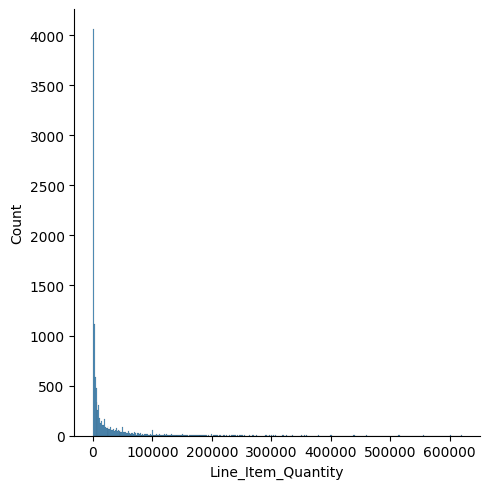

In [22]:
sns.displot(df['Line_Item_Quantity'])

<Axes: xlabel='Line_Item_Quantity', ylabel='Density'>

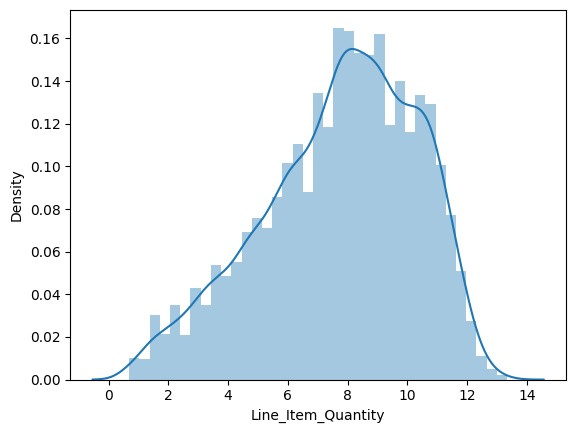

In [23]:
#lets see by applying log to make target feature normally distributed
sns.distplot(np.log(df['Line_Item_Quantity']+1))

In [24]:
y=np.log(df['Line_Item_Quantity']+1)
y

0         2.995732
1         6.908755
2         6.216606
3        10.371019
4        10.545368
           ...    
10319    12.023183
10320     9.955748
10321    13.151003
10322     9.768011
10323    10.508896
Name: Line_Item_Quantity, Length: 10263, dtype: float64

In [25]:
y.describe()

count    10263.000000
mean         7.737921
std          2.583426
min          0.693147
25%          6.031886
50%          8.014666
75%          9.753913
max         13.337475
Name: Line_Item_Quantity, dtype: float64

In [26]:
# Split the data into train and test sets
X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(X_transformed, y,test_size=0.2, random_state=42)

In [27]:
print(X_train.shape,X_test.shape)

(8210, 67) (2053, 67)


In [28]:
print(y_train_scaled.shape,y_test_scaled.shape)

(8210,) (2053,)


In [29]:
# Dictionary which contains models for experiment
models_list = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
     "K-Neighbors Regressor": KNeighborsRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor(),
    'LinearRegression':LinearRegression(),
    'LassoCV':LassoCV()
}


In [30]:
                def evaluate_regression(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: RMSE, MSE, MAE, R-squared, Adjusted R-squared
    '''
    mse = mean_squared_error(true, predicted)  # Calculate MSE
    r2 = r2_score(true, predicted)  # Calculate R-squared

    # Calculate Adjusted R-squared
    n = len(true)
    p = 1  # Number of features used for prediction (change if you have more features)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

 
    return  mse, r2, adj_r2


In [31]:
# Create a function which can evaluate models and return a report 
def evaluate_models(X, y, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    models_list = []
    train_mse=[]
    test_mse=[]
    train_r2_score=[]
    test_r2_score=[]
    train_adjusted_r2_score=[]
    test_adjusted_r2_score=[]
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    # Create cost of the model as per data description
    

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_mse,model_train_r2,model_train_adjusted_r2=evaluate_regression(y_train,y_train_pred)
        train_mse.append(model_train_mse)
        train_r2_score.append(model_train_r2)
        train_adjusted_r2_score.append(model_train_adjusted_r2)

        # Test set performance
        model_test_mse,model_test_r2,model_test_adjusted_r2=evaluate_regression(y_test,y_test_pred)
        test_mse.append(model_test_mse)
        test_r2_score.append(model_test_r2)
        test_adjusted_r2_score.append(model_test_adjusted_r2)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])

    
        print('Model performance for Training set')
        print('- MSE: {:.4f}'.format(model_train_mse)) 
        print('- R2_score: {:.4f}'.format(model_train_r2))
        print('- Adjusted R2 Score: {:.4f}'.format(model_train_adjusted_r2))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- MSE: {:.4f}'.format(model_test_mse)) 
        print('- R2_score: {:.4f}'.format(model_test_r2))
        print('- Adjusted R2 Score: {:.4f}'.format(model_test_adjusted_r2))
    
        print('='*35)
        print('\n')
        
    report = pd.DataFrame(list(zip(models_list, train_mse, train_r2_score, train_adjusted_r2_score, test_mse, test_r2_score, test_adjusted_r2_score)), columns=['Model Name', 'Train_MSE', 'Train_R2', 'Train_Adjusted_r2', 'Test_MSE', 'Test_R2', 'Test_Adjusted_R2']).sort_values(by=["Test_Adjusted_R2"], ascending=False)
    return report

In [42]:
report1=evaluate_models(X_transformed,y,models_list)
report1

Random Forest
Model performance for Training set
- MSE: 0.0000
- R2_score: 1.0000
- Adjusted R2 Score: 1.0000
----------------------------------
Model performance for Test set
- MSE: 0.0000
- R2_score: 1.0000
- Adjusted R2 Score: 1.0000


Decision Tree
Model performance for Training set
- MSE: 0.0000
- R2_score: 1.0000
- Adjusted R2 Score: 1.0000
----------------------------------
Model performance for Test set
- MSE: 0.0000
- R2_score: 1.0000
- Adjusted R2 Score: 1.0000


Gradient Boosting
Model performance for Training set
- MSE: 0.0004
- R2_score: 0.9999
- Adjusted R2 Score: 0.9999
----------------------------------
Model performance for Test set
- MSE: 0.0004
- R2_score: 0.9999
- Adjusted R2 Score: 0.9999


K-Neighbors Regressor
Model performance for Training set
- MSE: 0.6707
- R2_score: 0.8987
- Adjusted R2 Score: 0.8987
----------------------------------
Model performance for Test set
- MSE: 0.9956
- R2_score: 0.8555
- Adjusted R2 Score: 0.8554


XGBRegressor
Model performance f

,Model Name,Train_MSE,Train_R2,Train_Adjusted_r2,Test_MSE,Test_R2,Test_Adjusted_R2
0,Random Forest,1.382923e-06,1.000000,1.000000,0.000004,0.999999,0.999999
1,Decision Tree,3.536206e-30,1.000000,1.000000,0.000033,0.999995,0.999995
4,XGBRegressor,2.676417e-05,0.999996,0.999996,0.000049,0.999993,0.999993
2,Gradient Boosting,3.985001e-04,0.999940,0.999940,0.000440,0.999936,0.999936
5,AdaBoost Regressor,2.399039e-02,0.996376,0.996375,0.025383,0.996316,0.996314
3,K-Neighbors Regressor,6.706929e-01,0.898674,0.898662,0.995600,0.855507,0.855437
6,LinearRegression,2.498794e+00,0.622492,0.622446,2.662905,0.613528,0.613340
7,LassoCV,2.552683e+00,0.614351,0.614304,2.728960,0.603942,0.603749


In 1st experiment RandomForest Regressor is performing well without hypertunning let do crossvalidation

In [43]:
# Split the data into train and test sets
X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(X_transformed, y,test_size=0.2, random_state=42)

In [44]:
random=RandomForestRegressor()
xgb=XGBRegressor()
gd=GradientBoostingRegressor()

In [45]:
model1=random.fit(X_train,y_train_scaled)
model2=xgb.fit(X_train,y_train_scaled)
model3=gd.fit(X_train,y_train_scaled)

In [46]:
from sklearn import model_selection
from sklearn import metrics

In [47]:
cv = model_selection.KFold(n_splits=8)

In [48]:
for (train, test), i in zip(cv.split(X_train, y_train_scaled), range(8)):
    y_pred1 = model1.predict(X_test)
    y_pred2 = model2.predict(X_test)
    y_pred3 = model3.predict(X_test)
    print (metrics.mean_squared_error(y_test_scaled, y_pred1))
    print (metrics.mean_squared_error(y_test_scaled, y_pred2))
    print (metrics.mean_squared_error(y_test_scaled, y_pred3))
    print("*******************************************************")
    

5.143941624458835e-06
4.884026946682098e-05
0.0004403173030565953
*******************************************************
5.143941624458835e-06
4.884026946682098e-05
0.0004403173030565953
*******************************************************
5.143941624458835e-06
4.884026946682098e-05
0.0004403173030565953
*******************************************************


5.143941624458835e-06
4.884026946682098e-05
0.0004403173030565953
*******************************************************
5.143941624458835e-06
4.884026946682098e-05
0.0004403173030565953
*******************************************************
5.143941624458835e-06
4.884026946682098e-05
0.0004403173030565953
*******************************************************
5.143941624458835e-06
4.884026946682098e-05
0.0004403173030565953
*******************************************************
5.143941624458835e-06
4.884026946682098e-05
0.0004403173030565953
*******************************************************


In [50]:
# Define the models you want to evaluate
models = {
    "Random Forest": RandomForestRegressor(),
    "XGB": XGBRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Define the scoring metrics as individual strings
scoring = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False),
    'r2': 'r2',
    'mae': make_scorer(mean_absolute_error, greater_is_better=False)
}

# Loop through each model and perform cross-validation
for model_name, model in models.items():
    print(f"Model: {model_name}")
    
    # Separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y,test_size=0.2, random_state=42)
    
    # Fit the model
    model.fit(X_train, y_train)
  
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate scores using cross-validation
    for metric_name, metric_func in scoring.items():
        print(f"{metric_name.capitalize()}:")
        
        # Perform cross-validation and calculate the mean score
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring=metric_func)
        mean_score = scores.mean()
        print("  Mean:", mean_score)        
        print("="*35)
    print("\n")

Model: Random Forest
Mse:
  Mean: -9.069269431312607e-06
R2:
  Mean: 0.999998231996902
Mae:
  Mean: -0.0010748635818988426


Model: XGB
Mse:
  Mean: -8.517196178955505e-05
R2:
  Mean: 0.999987104098437
Mae:
  Mean: -0.0063001857057566075


Model: Gradient Boosting
Mse:
  Mean: -0.00042988353017871337
R2:
  Mean: 0.9999349499534695
Mae:
  Mean: -0.015068979576691626




After cross validation XGB Regressor is performing well 

Exeperiment NO2 : Simple Imputer by median + Robust Scaler-->Numeric data ,missing_value by constant ,one hot encoding -->categorical data

* Why not min_max scaler or StandardScaler ?
Since our data is not normaley distributed and numeric data has so many outlier robust scaler will treat outlier 



In [40]:
x=df.drop('Line_Item_Value',axis=1)
y=df['Line_Item_Value']

In [41]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())])

In [42]:
# Create transformers for categorical and numerical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first',handle_unknown='ignore'))
])

In [43]:
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_features),
        ('num', numerical_transformer, num_features)
    ])

In [44]:
# Create the final pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [45]:
scaler=RobustScaler()

In [49]:
# Fit and transform the data
X_transformed_2 = pipeline.fit_transform(x)

In [50]:
# Dictionary which contains models for experiment
models_list = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
     "K-Neighbors Regressor": KNeighborsRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor(),
    'LinearRegression':LinearRegression(),
    'LassoCV':LassoCV()
}


In [51]:
report2=evaluate_models(X_transformed_2,y_transformed,models_list)
report2

Random Forest
Model performance for Training set
- MSE: 0.0110
- R2_score: 0.9977
- Adjusted R2 Score: 0.9977
----------------------------------
Model performance for Test set
- MSE: 0.0518
- R2_score: 0.9873
- Adjusted R2 Score: 0.9873


Decision Tree
Model performance for Training set
- MSE: 0.0000
- R2_score: 1.0000
- Adjusted R2 Score: 1.0000
----------------------------------
Model performance for Test set
- MSE: 0.1555
- R2_score: 0.9619
- Adjusted R2 Score: 0.9619


Gradient Boosting
Model performance for Training set
- MSE: 0.0435
- R2_score: 0.9907
- Adjusted R2 Score: 0.9907
----------------------------------
Model performance for Test set
- MSE: 0.0706
- R2_score: 0.9827
- Adjusted R2 Score: 0.9827


K-Neighbors Regressor
Model performance for Training set
- MSE: 0.1690
- R2_score: 0.9639
- Adjusted R2 Score: 0.9639
----------------------------------
Model performance for Test set
- MSE: 0.1761
- R2_score: 0.9568
- Adjusted R2 Score: 0.9568


XGBRegressor
Model performance f

,Model Name,Train_MSE,Train_R2,Train_Adjusted_r2,Test_MSE,Test_R2,Test_Adjusted_R2
0,Random Forest,1.097248e-02,0.997654,0.997654,0.051842,0.987293,0.987287
4,XGBRegressor,8.944796e-04,0.999809,0.999809,0.057150,0.985992,0.985985
2,Gradient Boosting,4.353714e-02,0.990693,0.990692,0.070581,0.982700,0.982692
1,Decision Tree,3.240946e-34,1.000000,1.000000,0.155493,0.961888,0.961869
3,K-Neighbors Regressor,1.689510e-01,0.963884,0.963879,0.176146,0.956826,0.956804
6,LinearRegression,2.729632e-01,0.941649,0.941642,0.272586,0.933187,0.933155
7,LassoCV,2.787223e-01,0.940418,0.940411,0.283891,0.930417,0.930383
5,AdaBoost Regressor,1.589517e+00,0.660211,0.660170,1.641028,0.597773,0.597577


Lets do cross validation for above models 

In [52]:
# Define the models you want to evaluate
models = {
    "Random Forest": RandomForestRegressor(),
    "XGB": XGBRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Define the scoring metrics as individual strings
scoring = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False),
    'r2': 'r2',
    'mae': make_scorer(mean_absolute_error, greater_is_better=False)
}

# Loop through each model and perform cross-validation
for model_name, model in models.items():
    print(f"Model: {model_name}")
    
    # Separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X_transformed_2, y_transformed,test_size=0.2, random_state=42)
    
    # Fit the model
    model.fit(X_train, y_train)
  
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate scores using cross-validation
    for metric_name, metric_func in scoring.items():
        print(f"{metric_name.capitalize()}:")
        
        # Perform cross-validation and calculate the mean score
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring=metric_func)
        mean_score = scores.mean()
        print("  Mean:", mean_score)        
        print("="*35)
    print("\n")

Model: Random Forest
Mse:
  Mean: -0.0888492916635406
R2:
  Mean: 0.9812742678784385
Mae:
  Mean: -0.10177665186459242


Model: XGB
Mse:
  Mean: -0.06525044853809378
R2:
  Mean: 0.9862415725035799
Mae:
  Mean: -0.07859298072569401


Model: Gradient Boosting
Mse:
  Mean: -0.09148292804675252
R2:
  Mean: 0.9799634380064507
Mae:
  Mean: -0.13318302752098546




# Final Model

* After cross validation XGBRegressor is performing well

# Saving Final Model and Predicting for new data

In [22]:

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
import joblib

# Assuming you have your X and y prepared already

y=np.log(df['Line_Item_Value']+1)
x=df.drop('Line_Item_Value',axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create transformers for categorical and numerical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Define categorical and numerical features (replace with your actual feature lists)
cat_features =['PO_/_SO_#','ASN/DN_#','Country','Fulfill_Via','Vendor_INCO_Term','Shipment_Mode','Sub_Classification','First_Line_Designation'] # List of categorical feature column names
num_features = ['Unit_of_Measure_(Per_Pack)','Line_Item_Quantity','Pack_Price','Unit_Price','Weight_(Kilograms)','Freight_Cost_(USD)','Line_Item_Insurance_(USD)','Days_to_Process'] # List of numerical feature column names

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_features),
        ('num', numerical_transformer, num_features)
    ])

# Create an XGBoostRegressor
xgb_model = XGBRegressor(n_estimators=100, max_depth=3)  # Modify parameters as needed

# Create a pipeline that includes preprocessing and XGBoost model
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

# Fit the final pipeline on the training data
final_pipeline.fit(X_train, y_train)

# Evaluate the model
score = final_pipeline.score(X_test, y_test)
print(f"Model R-squared score: {score}")

# Save the final pipeline and model
joblib.dump(final_pipeline, 'final_pipeline.pkl')


Model R-squared score: 0.9959388251581128


['final_pipeline.pkl']

In [23]:
# To predict on new incoming data:
import joblib
loaded_pipeline = joblib.load('final_pipeline.pkl')

In [24]:
loaded_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['PO_/_SO_#', 'ASN/DN_#',
                                                   'Country', 'Fulfill_Via',
                                                   'Vendor_INCO_Term',
                                                   'Shipment_Mode',
                                                   'Sub_Classification',
                                                   'First_Line_Designati...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

# Prediction for new Data using saved Model and pipeline 

In [40]:
import pandas as pd
import joblib

# Load the trained final pipeline and model
final_pipeline = joblib.load('final_pipeline.pkl')

# Create a new DataFrame with the input data for prediction
input_data = pd.DataFrame({
    'PO_/_SO_#': ['PO'],  # Replace with your actual values
    'ASN/DN_#': ['DN'],
    'Country': ['Zimbabwe'],
    'Fulfill_Via': ['From RDC'],
    'Vendor_INCO_Term': ['N/A - From RDC'],
    'Shipment_Mode': ['Truck'],
    'Sub_Classification': ['Adult'],
    'Unit_of_Measure_(Per_Pack)': [60],
    'Line_Item_Quantity': [9073],
    'Pack_Price': [2.51],
    'Unit_Price': [0.04],
    'First_Line_Designation': ['Yes'],
    'Weight_(Kilograms)': [521.0],
    'Freight_Cost_(USD)': [2494.56],
    'Line_Item_Insurance_(USD)': [49.1],
    'Days_to_Process': ['239']
})

# Make predictions
predictions = final_pipeline.predict(input_data)

# The 'predictions' variable now contains the predicted values
print("Predicted Log(Line_Item_Value + 1):", predictions)

# If you want to convert the predictions back to the original scale (reverse the log transformation):
original_predictions = np.exp(predictions) - 1
print("Predicted Line_Item_Value:", original_predictions)


Predicted Log(Line_Item_Value + 1): [10.270558]
Predicted Line_Item_Value: [28869.002]


In [44]:
import pandas as pd
import joblib

# Load the trained final pipeline and model
final_pipeline = joblib.load('final_pipeline.pkl')

# Create a new DataFrame with the input data for prediction
input_data = pd.DataFrame({
'PO_/_SO_#':["SO"],
'ASN/DN_#':["DN"],
'Country':["Côte d'Ivoire"],
'Fulfill_Via':["From RDC"],
'Vendor_INCO_Term':["N/A - From RDC"],
'Shipment_Mode':["Air"],
'Sub_Classification':["Adult"],
'Unit_of_Measure_(Per_Pack)':[60],
'Line_Item_Quantity':[30000],
'Pack_Price':[8.76],
'Unit_Price':[0.15],
'First_Line_Designation':["Yes"],
'Weight_(Kilograms)':[2715.0],
'Freight_Cost_(USD)':[7403.18],
'Line_Item_Insurance_(USD)':[515.09],
'Days_to_Process':[110]
})

# Make predictions
predictions = final_pipeline.predict(input_data)

# The 'predictions' variable now contains the predicted values
print("Predicted Log(Line_Item_Value + 1):", predictions)

# If you want to convert the predictions back to the original scale (reverse the log transformation):
original_predictions = np.exp(predictions) - 1
print("Predicted Line_Item_Value:", original_predictions)


Predicted Log(Line_Item_Value + 1): [12.539958]
Predicted Line_Item_Value: [279275.6]


In [47]:
import pandas as pd
import joblib

# Load the trained final pipeline and model
final_pipeline = joblib.load('final_pipeline.pkl')

# Create a new DataFrame with the input data for prediction
input_data = pd.DataFrame({

'PO_/_SO_#':["SCMS"],
'ASN/DN_#' :["ASN"],
'Country':["Vietnam"],
'Fulfill_Via':["Direct Drop"],
'Vendor_INCO_Term':['FCA'],
'Shipment_Mode':["Air"],
'Sub_Classification':["Pediatric"],
'Unit_of_Measure_(Per_Pack)':[300],
'Line_Item_Quantity':[300],
'Line_Item_Value':[18246.0],
'Pack_Price':[60.82],
'Unit_Price':[0.2],
'First_Line_Designation':["Yes"],
'Weight_(Kilograms)':[275.0],
'Freight_Cost_(USD)':[1015.98],
'Line_Item_Insurance_(USD)':[25.58],
'Days_to_Process':[232]

})

# Make predictions
predictions = final_pipeline.predict(input_data)

# The 'predictions' variable now contains the predicted values
print("Predicted Log(Line_Item_Value + 1):", predictions)

# If you want to convert the predictions back to the original scale (reverse the log transformation):
original_predictions = np.exp(predictions) - 1
print("Predicted Line_Item_Value:", original_predictions)


Predicted Log(Line_Item_Value + 1): [9.712513]
Predicted Line_Item_Value: [16522.072]


# Lets try to do feature selection and try to fit model and checking its performance 

In [41]:
from sklearn.linear_model import LassoCV
import numpy as np

# Create a LassoCV model for feature selection
lasso = LassoCV(cv=5)

# Fit the Lasso model to the transformed data
lasso.fit(X_transformed, np.log(df['Line_Item_Quantity'] + 1))

# Get the feature importances (coefficients)
feature_importances = lasso.coef_

# Get the original feature names from the DataFrame
original_feature_names = df.columns[:-1]  # Exclude the target column

# Create a dictionary to store feature importance values with original feature names
feature_importance_dict = dict(zip(original_feature_names, feature_importances))

# Print out the feature importances
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True):
    print(f"{feature}: {importance:.4f}")

Pack_Price: -1.4317
Sub_Classification: -1.4312
ASN/DN_#: 0.8853
Unit_Price: 0.5805
Freight_Cost_(USD): 0.3697
Line_Item_Quantity: -0.2792
Weight_(Kilograms): 0.2773
PO_/_SO_#: -0.2153
Country: 0.0000
Fulfill_Via: -0.0000
Vendor_INCO_Term: -0.0000
Shipment_Mode: 0.0000
Unit_of_Measure_(Per_Pack): -0.0000
Line_Item_Value: 0.0000
First_Line_Designation: -0.0000
Line_Item_Insurance_(USD): -0.0000


 lets try to fit models and check their performance with thsese selected features

In [32]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib

# Assuming you have your X and y prepared already

y=np.log(df['Line_Item_Value']+1)
x=df.drop('Line_Item_Value',axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create transformers for categorical and numerical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])


# Define categorical and numerical features (replace with your actual feature lists)
cat_features =['PO_/_SO_#','ASN/DN_#','Sub_Classification'] # List of categorical feature column names
num_features = ['Line_Item_Quantity','Pack_Price','Unit_Price','Weight_(Kilograms)','Freight_Cost_(USD)']
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_features),
        ('num', numerical_transformer, num_features)
    ])

# Create a pipeline that includes preprocessing and XGBoost model
selected_features_pipeline= Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [33]:
X_transformed_feature_selected=selected_features_pipeline.fit_transform(x)

In [34]:
report_with_selected_features=evaluate_models(X_transformed_feature_selected,np.log(df['Line_Item_Value']+1),models_list)
report_with_selected_features

Random Forest
Model performance for Training set
- MSE: 0.0006
- R2_score: 0.9999
- Adjusted R2 Score: 0.9999
----------------------------------
Model performance for Test set
- MSE: 0.0037
- R2_score: 0.9994
- Adjusted R2 Score: 0.9994


Decision Tree
Model performance for Training set
- MSE: 0.0000
- R2_score: 1.0000
- Adjusted R2 Score: 1.0000
----------------------------------
Model performance for Test set
- MSE: 0.0123
- R2_score: 0.9981
- Adjusted R2 Score: 0.9981


Gradient Boosting
Model performance for Training set
- MSE: 0.0127
- R2_score: 0.9981
- Adjusted R2 Score: 0.9981
----------------------------------
Model performance for Test set
- MSE: 0.0142
- R2_score: 0.9978
- Adjusted R2 Score: 0.9978


K-Neighbors Regressor
Model performance for Training set
- MSE: 0.5865
- R2_score: 0.9124
- Adjusted R2 Score: 0.9124
----------------------------------
Model performance for Test set
- MSE: 0.9712
- R2_score: 0.8505
- Adjusted R2 Score: 0.8504


XGBRegressor
Model performance f

,Model Name,Train_MSE,Train_R2,Train_Adjusted_r2,Test_MSE,Test_R2,Test_Adjusted_R2
0,Random Forest,5.891621e-04,0.999912,0.999912,0.003725,0.999427,0.999426
4,XGBRegressor,1.522286e-03,0.999773,0.999773,0.004802,0.999261,0.999261
1,Decision Tree,4.265853e-12,1.000000,1.000000,0.012298,0.998107,0.998106
2,Gradient Boosting,1.266149e-02,0.998110,0.998109,0.014212,0.997813,0.997812
5,AdaBoost Regressor,3.210308e-01,0.952072,0.952066,0.318906,0.950917,0.950893
3,K-Neighbors Regressor,5.865159e-01,0.912437,0.912426,0.971233,0.850518,0.850445
7,LassoCV,3.842891e+00,0.426281,0.426211,4.129875,0.364371,0.364061
6,LinearRegression,3.837231e+00,0.427126,0.427056,4.138730,0.363008,0.362698


In [35]:
# lets do cross validation :
# Define the models you want to evaluate
models = {
    "Random Forest": RandomForestRegressor(),
    "XGB": XGBRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

# Define the scoring metrics as individual strings
scoring = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False),
    'r2': 'r2',
    'mae': make_scorer(mean_absolute_error, greater_is_better=False)
}

# Loop through each model and perform cross-validation
for model_name, model in models.items():
    print(f"Model: {model_name}")
    
    # Separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X_transformed_feature_selected,np.log(df['Line_Item_Value']+1),test_size=0.2, random_state=42)
    
    # Fit the model
    model.fit(X_train, y_train)
  
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate scores using cross-validation
    for metric_name, metric_func in scoring.items():
        print(f"{metric_name.capitalize()}:")
        
        # Perform cross-validation and calculate the mean score
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring=metric_func)
        mean_score = scores.mean()
        print("  Mean:", mean_score)        
        print("="*35)
    print("\n")

Model: Random Forest


Mse:
  Mean: -0.005110040416202118
R2:
  Mean: 0.9992367885939337
Mae:
  Mean: -0.03349091938464806


Model: XGB
Mse:
  Mean: -0.007025210467558879
R2:
  Mean: 0.9989554304500095
Mae:
  Mean: -0.05276054973350491


Model: Gradient Boosting
Mse:
  Mean: -0.016415227920605305
R2:
  Mean: 0.997512283963854
Mae:
  Mean: -0.09428004727788758




In [36]:

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib

# Assuming you have your X and y prepared already

y=np.log(df['Line_Item_Value']+1)
x=df.drop('Line_Item_Value',axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create transformers for categorical and numerical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])


# Define categorical and numerical features (replace with your actual feature lists)
cat_features =['PO_/_SO_#','ASN/DN_#','Sub_Classification'] # List of categorical feature column names
num_features = ['Line_Item_Quantity','Pack_Price','Unit_Price','Weight_(Kilograms)','Freight_Cost_(USD)']
# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_features),
        ('num', numerical_transformer, num_features)
    ])

# Create an XGBoostRegressor
xgb_model = XGBRegressor(n_estimators=100, max_depth=3)  # Modify parameters as needed

# Create a pipeline that includes preprocessing and XGBoost model
final_pipeline_selected_features= Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', xgb_model)
])

# Fit the final pipeline on the training data
final_pipeline_selected_features.fit(X_train, y_train)

# Evaluate the model
score = final_pipeline_selected_features.score(X_test, y_test)
print(f"Model R-squared score: {score}")

# Save the final pipeline and model
joblib.dump(final_pipeline_selected_features, 'final_pipeline_with_selected_features.pkl')


Model R-squared score: 0.9972723510061468


['final_pipeline_with_selected_features.pkl']

lets do prediction using model saved with selected features 

In [37]:
import pandas as pd
import joblib

# Load the trained final pipeline and model
final_pipeline = joblib.load('final_pipeline.pkl')

# Create a new DataFrame with the input data for prediction
input_data = pd.DataFrame({

'PO_/_SO_#':["SCMS"],
'ASN/DN_#' :["ASN"],
'Sub_Classification':["Pediatric"],
'Line_Item_Quantity':[300],
'Pack_Price':[60.82],
'Unit_Price':[0.2],
'Weight_(Kilograms)':[275.0],
'Freight_Cost_(USD)':[1015.98],

})

# Make predictions
predictions = final_pipeline_selected_features.predict(input_data)

# The 'predictions' variable now contains the predicted values
print("Predicted Log(Line_Item_Value + 1):", predictions)

# If you want to convert the predictions back to the original scale (reverse the log transformation):
original_predictions = np.exp(predictions) - 1
print("Predicted Line_Item_Value:", original_predictions)


Predicted Log(Line_Item_Value + 1): [9.788671]
Predicted Line_Item_Value: [17829.586]


In [44]:
import joblib

# Load the trained final pipeline and model
final_pipeline = joblib.load('final_pipeline.pkl')

# Create a new DataFrame with the input data for prediction
input_data = pd.DataFrame({
'PO_/_SO_#':["SCMS"],
'ASN/DN_#':["ASN"],
'Sub_Classification':["HIV test"],
'Line_Item_Quantity':[597],
'Pack_Price':[32.0],
'Unit_Price':[1.6],
'Weight_(Kilograms)':[209.0],
'Freight_Cost_(USD)':[3088.4],
})
# Make predictions
predictions = final_pipeline_selected_features.predict(input_data)

# The 'predictions' variable now contains the predicted values
print("Predicted Log(Line_Item_Value + 1):", predictions)

# If you want to convert the predictions back to the original scale (reverse the log transformation):
original_predictions = np.exp(predictions) - 1
print("Predicted Line_Item_Value:", original_predictions)

Predicted Log(Line_Item_Value + 1): [9.881784]
Predicted Line_Item_Value: [19569.613]


Conclusion : Since we have done feature selection using LassoCV and it is performing well and giving prediction very close to our real values so we can continue with our selected feature model